In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
train = pd.read_csv('C:/Users/成行/Desktop/项目/幸福感预测/dataset/happiness_train_complete.csv', parse_dates=['survey_time'], encoding='latin-1')#读取训练数据
test = pd.read_csv('C:/Users/成行/Desktop/项目/幸福感预测/dataset/happiness_test_complete.csv', parse_dates=['survey_time'], encoding='latin-1')#读取测试数据
train.head()#默认显示前五行数据

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015-08-04 14:18:00,1,1959,1,...,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015-07-21 15:04:00,1,1992,1,...,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015-07-21 13:24:00,2,1967,1,...,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015-07-25 17:33:00,2,1943,1,...,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015-08-10 09:50:00,2,1994,1,...,2,50,50,50,50,50.0,50,50,50,50


#数据清洗

In [4]:
train.shape

(8000, 140)

In [5]:
o=set(train['happiness'])#创建一个集合，包括happiness这一列的组成数字
print(o)

{1, 2, 3, 4, 5, -8}


In [6]:
train['happiness']=train['happiness'].replace(-8,3)

In [7]:
#定义缺失项检测函数
def check_missing(df):
    miss=df.isnull().sum().any()#pandas判断缺失值一般采用 isnull()，生成的是所有数据的 true／false 矩阵;sum函数生成每列缺失值的数量；any函数生成哪些列含有缺失值
    print(miss)
    if miss:
        total_miss=df.isnull().sum()#统计每一列缺失值的个数
        print(df.isnull().sum())
        percent=(df.isnull().sum())/(df.isnull().count())#计算每一列数据的缺失度
        output=pd.concat([total_miss,percent],axis=1,keys=['Total','percent'])#数据合并函数，axis=1表示横向合并
        data_type=[]#创建一个空列表
        for col in df.columns:#对于数据集中的每一列
            dType=str(df[col].dtype)#dtype得到该列数值的类型例如（int64）,str()函数将类型名称已字符串的形式输出
            data_type.append(dType)#将dType的值附加到data_type这个空列表里面,不使用append()函数直接进行赋值操作也可
        output['Types']=data_type#将这个列表赋值给输出列表的某一列
        print (output[output['Total']!=0])#打印output列表中缺失项个数不为0的列
        return np.transpose(output)#进行矩阵的转置操作
    else:
        return False
check_missing(train)
    


True
id                  0
happiness           0
survey_type         0
province            0
city                0
                   ..
public_service_5    0
public_service_6    0
public_service_7    0
public_service_8    0
public_service_9    0
Length: 140, dtype: int64
                 Total   percent    Types
edu_other         7997  0.999625   object
edu_status        1120  0.140000  float64
edu_yr            1972  0.246500  float64
join_party        7176  0.897000  float64
property_other    7934  0.991750   object
hukou_loc            4  0.000500  float64
social_neighbor    796  0.099500  float64
social_friend      796  0.099500  float64
work_status       5049  0.631125  float64
work_yr           5049  0.631125  float64
work_type         5049  0.631125  float64
work_manage       5049  0.631125  float64
family_income        1  0.000125  float64
invest_other      7971  0.996375   object
minor_child       1066  0.133250  float64
marital_1st        828  0.103500  float64
s_birth      

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,int64,int64,datetime64[ns],int64,int64,int64,...,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64


In [8]:
train['hukou_loc']=train['hukou_loc'].fillna(4)
train['family_income']=train['family_income'].fillna(train['family_income'].mean())

In [9]:
# 计算调查者年龄，调查年份-出生年份
import datetime as dt
train['survey_time'] = train['survey_time'].dt.year  # train['survey_time'].dt实现datatime标准形式例如1998-10-19
train['age'] = train['survey_time'] - train['birth']
test['survey_time'] = test['survey_time'].dt.year  
test['age'] = test['survey_time'] - test['birth']
train['age'].head()#显示age这一列的前五行

0    56
1    23
2    48
3    72
4    21
Name: age, dtype: int64

In [10]:
#public_seervice
train["public_service"]=0#新增一列栏目为total["public_service"],并将初始值设置为0，用以存储对所有public_service1-9系列的值
i=1
while i<10:                                                                                                                                                                                                                                                                                                                                                                                                                                                
    train["public_service"]=train["public_service"]+train["public_service_"+str(i)]#将所有的值public_service1-9系列的值加起来
    train=train.drop(["public_service_"+str(i)],axis=1)#drop删除行或者列 axis=1时删除列，=0时删除行 加完值后便将public_service1-9列删除
    i=i+1
 #trust
train["trust"]=0
i=1
while i<14:
    train["trust"]=train["trust"]+train["trust_"+str(i)]
    train=train.drop(["trust_"+str(i)],axis=1)
    i=i+1
train["property"]=0
i=0
while i<9:
    train["property"]=train["property"]+train["property_"+str(i)]
    train=train.drop(["property_"+str(i)],axis=1)
    i=i+1
train["media"]=0
i=1
while i<7:
    train["media"]=train["media"]+train["media_"+str(i)]
    train=train.drop(["media_"+str(i)],axis=1)
    i=i+1
train["leisure"]=0
i=1
while i<13:
    train["leisure"]=train["leisure"]+train["leisure_"+str(i)]
    train=train.drop(["leisure_"+str(i)],axis=1)
    i=i+1
train["insur"]=0
i=1
while i<5:
    train["insur"]=train["insur"]+train["insur_"+str(i)]
    train=train.drop(["insur_"+str(i)],axis=1)
    i=i+1
train["invest"]=0
i=0
while i<9:
    train["invest"]=train["invest"]+train["invest_"+str(i)]
    train=train.drop(["invest_"+str(i)],axis=1)
    i=i+1
test["public_service"]=0#新增一列栏目为total["public_service"],并将初始值设置为0，用以存储对所有public_service1-9系列的值
i=1
while i<10:                                                                                                                                                                                                                                                                                                                                                                                                                                                
    test["public_service"]=test["public_service"]+test["public_service_"+str(i)]#将所有的值public_service1-9系列的值加起来
    test=test.drop(["public_service_"+str(i)],axis=1)#drop删除行或者列 axis=1时删除列，=0时删除行 加完值后便将public_service1-9列删除
    i=i+1
    
test["trust"]=0
i=1
while i<14:
    test["trust"]=test["trust"]+test["trust_"+str(i)]
    test=test.drop(["trust_"+str(i)],axis=1)
    i=i+1
    
test["property"]=0
i=0
while i<9:
    test["property"]=test["property"]+test["property_"+str(i)]
    test=test.drop(["property_"+str(i)],axis=1)
    i=i+1
    
test["media"]=0
i=1
while i<7:
    test["media"]=test["media"]+test["media_"+str(i)]
    test=test.drop(["media_"+str(i)],axis=1)
    i=i+1
    
test["leisure"]=0
i=1
while i<13:
    test["leisure"]=test["leisure"]+test["leisure_"+str(i)]
    test=test.drop(["leisure_"+str(i)],axis=1)
    i=i+1
    
test["insur"]=0
i=1
while i<5:
    test["insur"]=test["insur"]+test["insur_"+str(i)]
    test=test.drop(["insur_"+str(i)],axis=1)
    i=i+1
    
test["invest"]=0
i=0
while i<9:
    test["invest"]=test["invest"]+test["invest_"+str(i)]
    test=test.drop(["invest_"+str(i)],axis=1)
    i=i+1


In [11]:
#缺失值填充
miss_data = train.isnull().sum().sort_values(ascending=False)  # 一列中缺失值的数量，降序排列
total_miss = train.isnull().count()  # 一列中数据的个数
miss_data_tmp = (miss_data / total_miss).sort_values(ascending=False)  # 缺失值占比，降序排列
def precent(X):
    X = '%.2f%%' % (X * 100)
    return X
miss_precent = miss_data_tmp.map(precent)
miss_data_precent = pd.concat([miss_precent, miss_data_tmp], axis=1, keys=[
                              'Percent', 'Percent_tmp']).sort_values(by='Percent_tmp', ascending=False)
print(miss_data_precent[miss_data_precent['Percent'] != '0.00%'])
drop_columns = miss_data_precent[miss_data_precent['Percent_tmp'] > 0.15].index
data_train = train.drop(drop_columns, axis=1)
data_test = test.drop(drop_columns, axis=1)
class_variable = [
    col for col in test.columns if train[col].dtypes == 'O']
# 数值型变量
numerical_variable = [
    col for col in test.columns if train[col].dtypes != 'O']  # 大写o
print('类别型变量:%s' % class_variable, '数值型变量:%s' % numerical_variable)
from sklearn.preprocessing import Imputer
#Imputer填充模块
padding = Imputer(strategy='most_frequent')#用众数进行填充，strategy=‘most——frequent’众数，mean是均值，medain中位数
train[numerical_variable] = padding.fit_transform(train[numerical_variable])
test[numerical_variable] = padding.fit_transform(test[numerical_variable])
# 类别变量用None填充
train[class_variable] = train[class_variable].fillna('None')
test[class_variable] = test[class_variable].fillna('None')

                Percent  Percent_tmp
edu_other        99.96%     0.999625
invest_other     99.64%     0.996375
property_other   99.17%     0.991750
join_party       89.70%     0.897000
s_work_type      67.94%     0.679375
s_work_status    67.94%     0.679375
work_manage      63.11%     0.631125
work_status      63.11%     0.631125
work_type        63.11%     0.631125
work_yr          63.11%     0.631125
edu_yr           24.65%     0.246500
marital_now      22.12%     0.221250
s_birth          21.48%     0.214750
s_edu            21.48%     0.214750
s_hukou          21.48%     0.214750
s_income         21.48%     0.214750
s_political      21.48%     0.214750
s_work_exper     21.48%     0.214750
edu_status       14.00%     0.140000
minor_child      13.33%     0.133250
marital_1st      10.35%     0.103500
social_friend     9.95%     0.099500
social_neighbor   9.95%     0.099500
类别型变量:['edu_other', 'property_other', 'invest_other'] 数值型变量:['id', 'survey_type', 'province', 'city', 'county', 

d:\py\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#数据分析

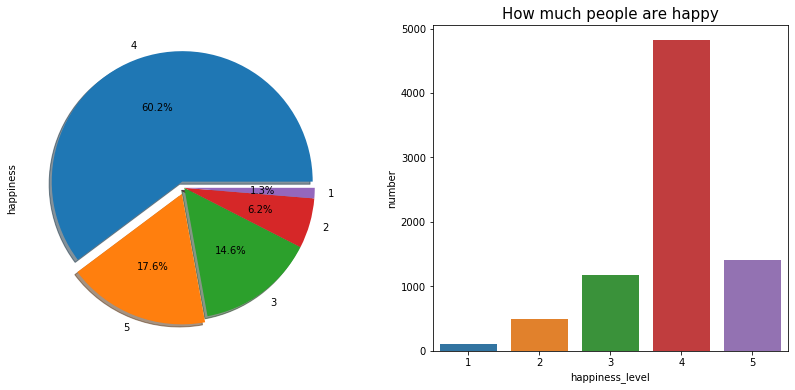

In [12]:
f,ax=plt.subplots(1,2,figsize=(14,6))#绘制一行两列个子图（两个），大小为（14*6），ax[0],ax[1]分别代表两个子图
explode = (0.05,0.05,0,0,0)#饼状图各部分分离程度
#value_counts()统计每种值出现的频率，plot.pie（autopct圆里面的文本格式，%1.1f%%表示小数有一位，整数有一位的浮点数）
#shadow，饼是否有阴影
train['happiness'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,explode=explode)
ax[1].set_xlabel('happiness_level')
# 用seaborn的计数图
sns.countplot('happiness',data=train,ax=ax[1])#画计数直方图
#ax[1] = train['happiness'].value_counts().plot.bar()
ax[1].set_title('How much people are happy',fontsize=15)
ax[1].set_xlabel('happiness_level')
ax[1].set_ylabel('number')
plt.show()


In [13]:
# 年龄与幸福指数的pearson相关系数，几乎不相关
train['happiness'].corr(train['age'], method='pearson')

0.004704486424158727

In [14]:
# 显示数据的统计量，均值、标准差、最小值、分位数、最大值
train.describe()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,inc_exp,neighbor_familiarity,age,public_service,trust,property,media,leisure,insur,invest
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.0,8000.00000,8000.000000,8000.00000,...,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,3.866625,1.405500,15.155375,42.564750,70.619000,2015.0,1.53000,1964.707625,1.37350,...,2.337343e+05,3.722250,50.292375,596.772187,24.406250,1.139375,13.289125,44.785125,5.951500,1.014750
std,2309.54541,0.818792,0.491019,8.917100,27.187404,38.747503,0.0,0.49913,16.842865,1.52882,...,2.975868e+06,1.143358,16.842865,164.291206,23.198421,0.401210,4.350247,8.496572,2.169847,0.171861
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.0,1.00000,1921.000000,-8.00000,...,-3.000000e+00,-8.000000,18.000000,-27.000000,-104.000000,0.000000,-48.000000,-96.000000,-32.000000,0.000000
25%,2000.75000,4.000000,1.000000,7.000000,18.000000,37.000000,2015.0,1.00000,1952.000000,1.00000,...,1.000000e+04,3.000000,38.000000,530.000000,10.000000,1.000000,10.000000,40.000000,6.000000,1.000000
50%,4000.50000,4.000000,1.000000,15.000000,42.000000,73.000000,2015.0,2.00000,1965.000000,1.00000,...,4.000000e+04,4.000000,50.000000,630.000000,30.000000,1.000000,13.000000,45.000000,6.000000,1.000000
75%,6000.25000,4.000000,2.000000,22.000000,65.000000,104.000000,2015.0,2.00000,1977.000000,1.00000,...,8.000000e+04,5.000000,63.000000,706.250000,42.000000,1.000000,16.000000,51.000000,7.000000,1.000000
max,8000.00000,5.000000,2.000000,31.000000,89.000000,134.000000,2015.0,2.00000,1997.000000,8.00000,...,1.000000e+08,5.000000,94.000000,900.000000,65.000000,4.000000,30.000000,60.000000,8.000000,4.000000


##data.describe() #基本统计量
count   数量
mean    均值
std     标准差
min     最小值
25%     下四分位
50%     中位数
75%     上四分位
max     最大值


In [15]:
# 家庭收入与幸福指数的pearson相关系数（是否在一条直线上面），几乎不相关
train['happiness'].corr(train['family_income'], method='pearson')

0.05168655743647725

In [16]:
## 分性别分析,1男，2女
train.groupby(['gender', 'happiness'])['happiness'].count()#groupby（）函数实现分组统计

gender  happiness
1.0     1              43
        2             216
        3             596
        4            2306
        5             599
2.0     1              61
        2             281
        3             575
        4            2512
        5             811
Name: happiness, dtype: int64

Text(0.5, 0.98, 'The proportion of happiness level in differenr gender')

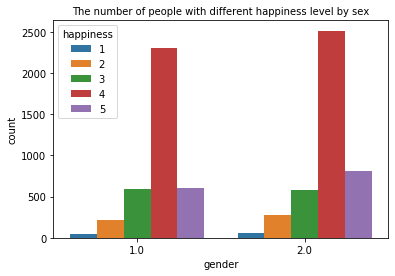

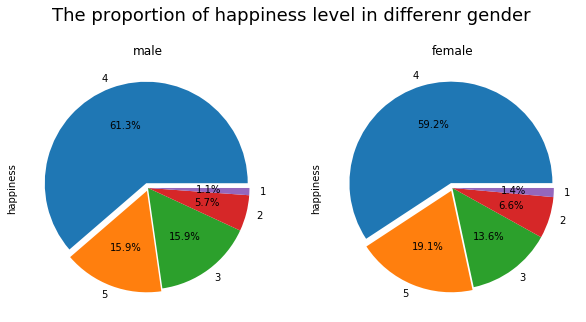

In [17]:
# 男女的幸福指数比较
# hue为色彩色度的意思，可以理解为hue决定具有多彩的标签
sns.countplot(x='gender', hue='happiness', data=train)
plt.title('The number of people with different happiness level by sex',fontsize=10)
# 在男性女性中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,2,figsize=(10,5))
explode = (0.05,0.03,0,0,0)# 部分分离开
#value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值。
train['happiness'][train['gender']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='male')
train['happiness'][train['gender']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='female')
#添加总标题
fig.suptitle('The proportion of happiness level in differenr gender', fontsize=18, verticalalignment='center')

Text(0.5, 0.98, 'The number of people with different happiness level by sample type')

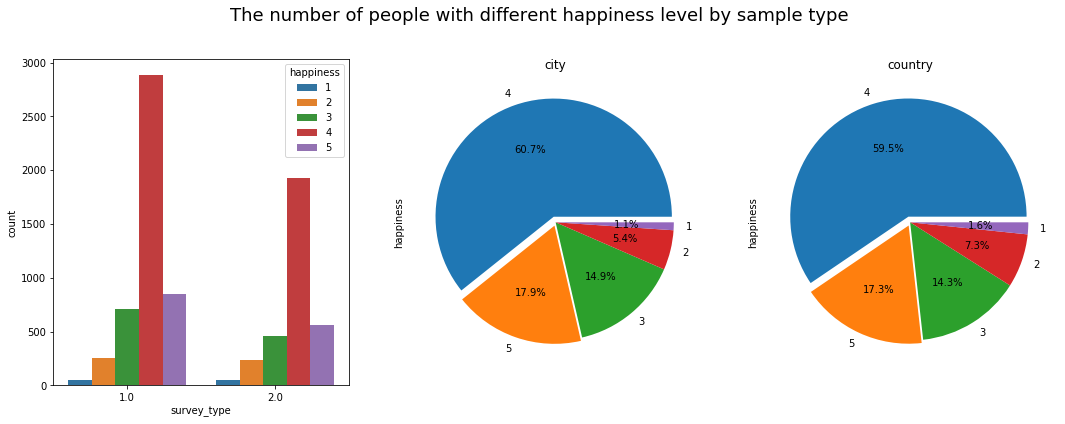

In [18]:
# 样本类型的幸福指数比较，1表示城市，2表示农村
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.countplot(x='survey_type', hue='happiness', data=train, ax=ax[0])
# 在样本类型中，5个happiness level所占比例pie图
explode = (0.05,0.03,0,0,0)   
train['happiness'][train['survey_type']==1].value_counts().plot.pie(autopct='%1.1f%%', explode=explode,title='city',ax=ax[1],)
train['happiness'][train['survey_type']==2].value_counts().plot.pie(autopct='%1.1f%%', explode=explode,title='country',ax=ax[2])
f.suptitle('The number of people with different happiness level by sample type', fontsize=18, verticalalignment='center')

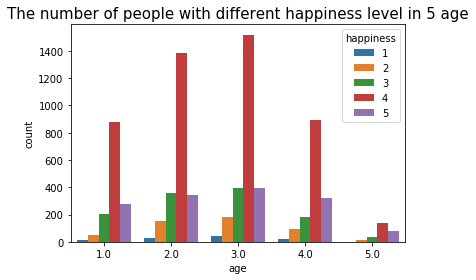

In [19]:
# 将年龄分阶段
## 按每个年龄阶段分析幸福感
# train.dtypes
combine=[train,test]
for dataset in combine:
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1#根据元素的选取条件来选取对应的数据集，并在符合条件的数据行添加flage标签 
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[(dataset['age'] > 64) & (dataset['age'] <= 80), 'age'] = 4
    dataset.loc[ dataset['age'] > 80, 'age'] = 5 
sns.countplot('age',hue='happiness',data=train)
plt.title('The number of people with different happiness level in 5 age',fontsize=15)
train['age'] = train['age'].astype(int)#强制数据类型转换

Text(0, 0.5, 'The number of people')

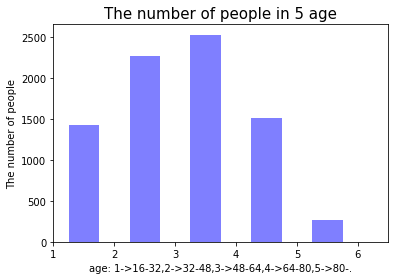

In [20]:
## 分年龄分析
# 绘制直方图，得到每个年龄段的频数
plt.hist(train['age'], range=(1,6), histtype='bar', align='right', color='blue',alpha=0.5)
plt.title('The number of people in 5 age',fontsize=15)
plt.xlabel('age: 1->16-32,2->32-48,3->48-64,4->64-80,5->80-.')
plt.ylabel('The number of people')

Text(0.5, 0.98, 'The proportion of happiness level in differenr age')

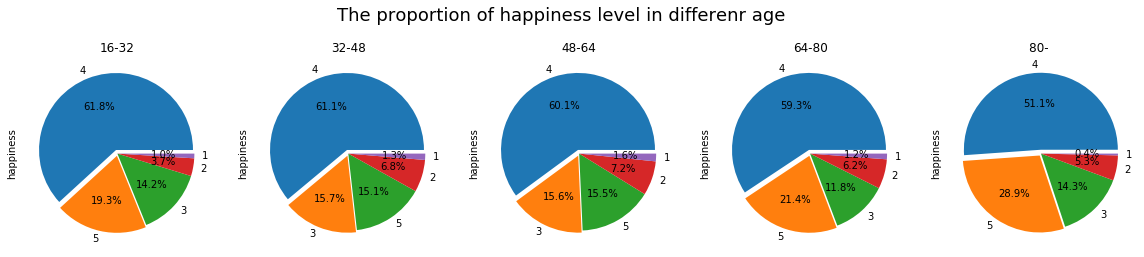

In [21]:
# 在各个年龄段中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,5,figsize=(20,4))
# 部分分离开
explode = (0.05,0.03,0,0,0)
train['happiness'][train['age']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='16-32')
train['happiness'][train['age']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='32-48')
train['happiness'][train['age']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='48-64')
train['happiness'][train['age']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='64-80')
train['happiness'][train['age']==5].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[4], explode=explode,title='80- ')
fig.suptitle('The proportion of happiness level in differenr age', fontsize=18, verticalalignment='center')

Text(0.5, 0.98, 'The proportion of happiness level in differenr inc_ability')

d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29702 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24120 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:180: Runt

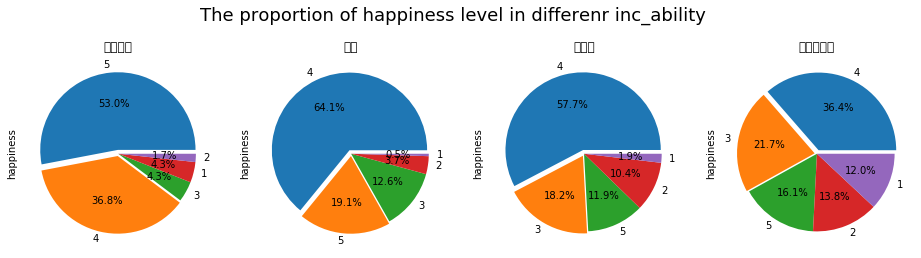

In [22]:
# 在收入合理四个阶段中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,4,figsize=(16,4))
explode = (0.05,0.03,0,0,0)
train['happiness'][train['inc_ability']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='非常合理')
train['happiness'][train['inc_ability']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='合理')
train['happiness'][train['inc_ability']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='不合理')
train['happiness'][train['inc_ability']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='非常不合理')
fig.suptitle('The proportion of happiness level in differenr inc_ability', fontsize=18, verticalalignment='center')

Text(0.5, 0.98, 'The proportion of happiness level in differenr equity')

d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23436 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\py\lib\site-packages\matplotlib\backends\backend_agg.py:180: Runt

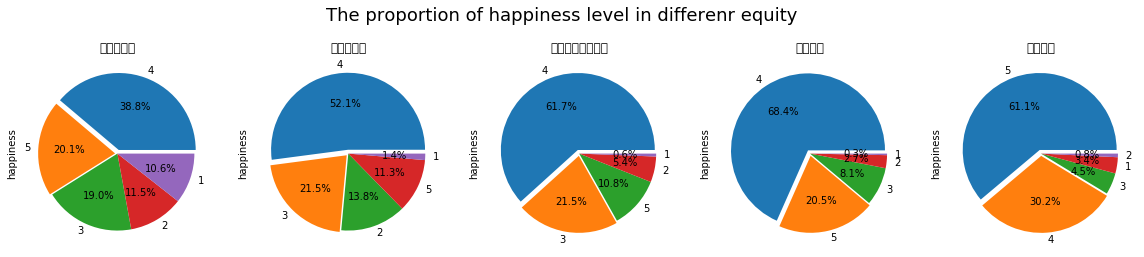

In [23]:
# 在社会公平5个阶段中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,5,figsize=(20,4))
explode = (0.05,0.03,0,0,0)
train['happiness'][train['equity']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='完全不公平')
train['happiness'][train['equity']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='比较不公平')
train['happiness'][train['equity']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='说不上公平不公平')
train['happiness'][train['equity']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='比较公平')
train['happiness'][train['equity']==5].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[4], explode=explode,title='完全公平')
fig.suptitle('The proportion of happiness level in differenr equity', fontsize=18, verticalalignment='center')

Text(0.5, 1.0, 'The number of people with different work experence by age')

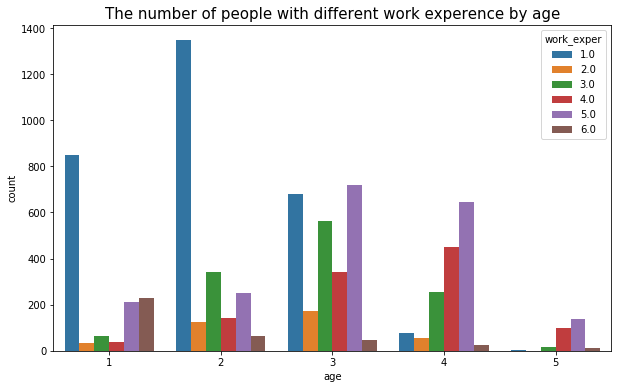

In [24]:
# 每个年龄段的具有不同工作经历的人数
f,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot('age',hue='work_exper', data=train)
plt.title('The number of people with different work experence by age',fontsize=15)

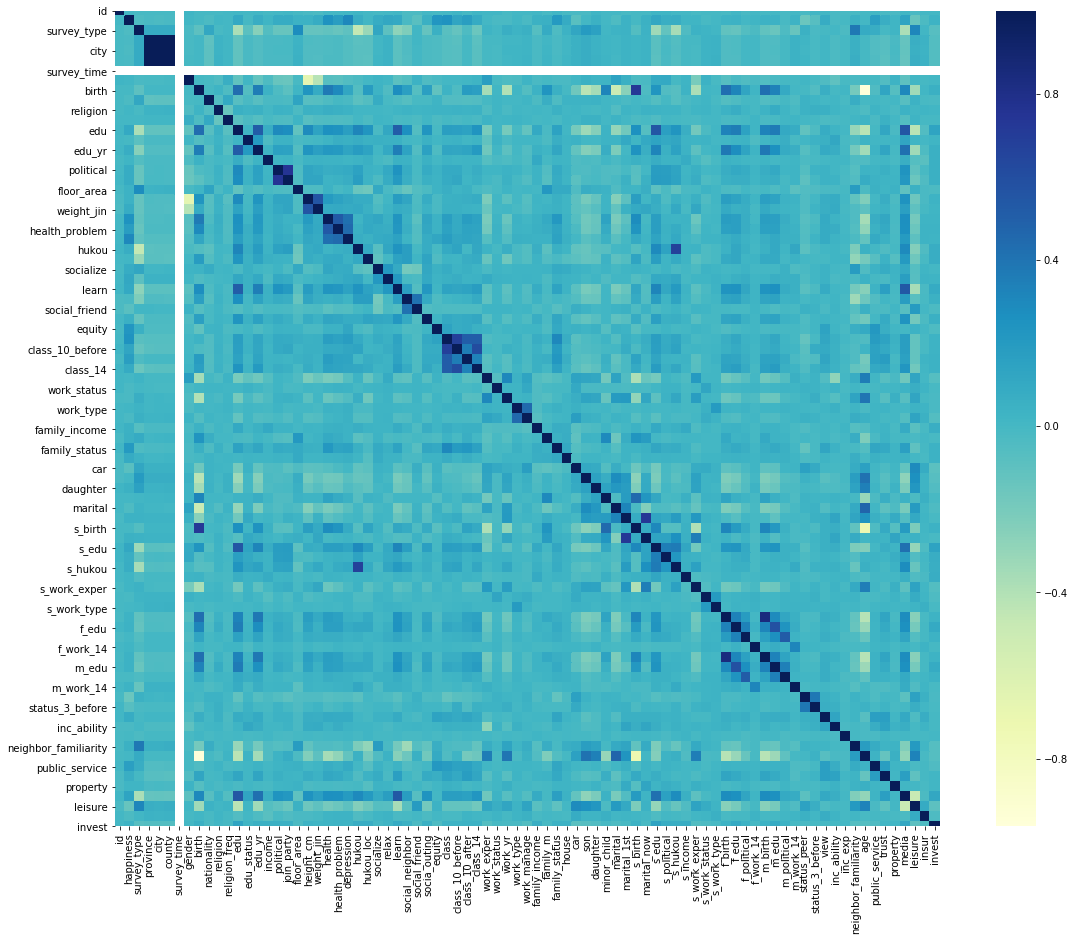

In [25]:
#相关性矩阵
corrmat =train.corr()#corr()显示任意两个变量的相关系数
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, square=True,cmap='YlGnBu')
plt.show()


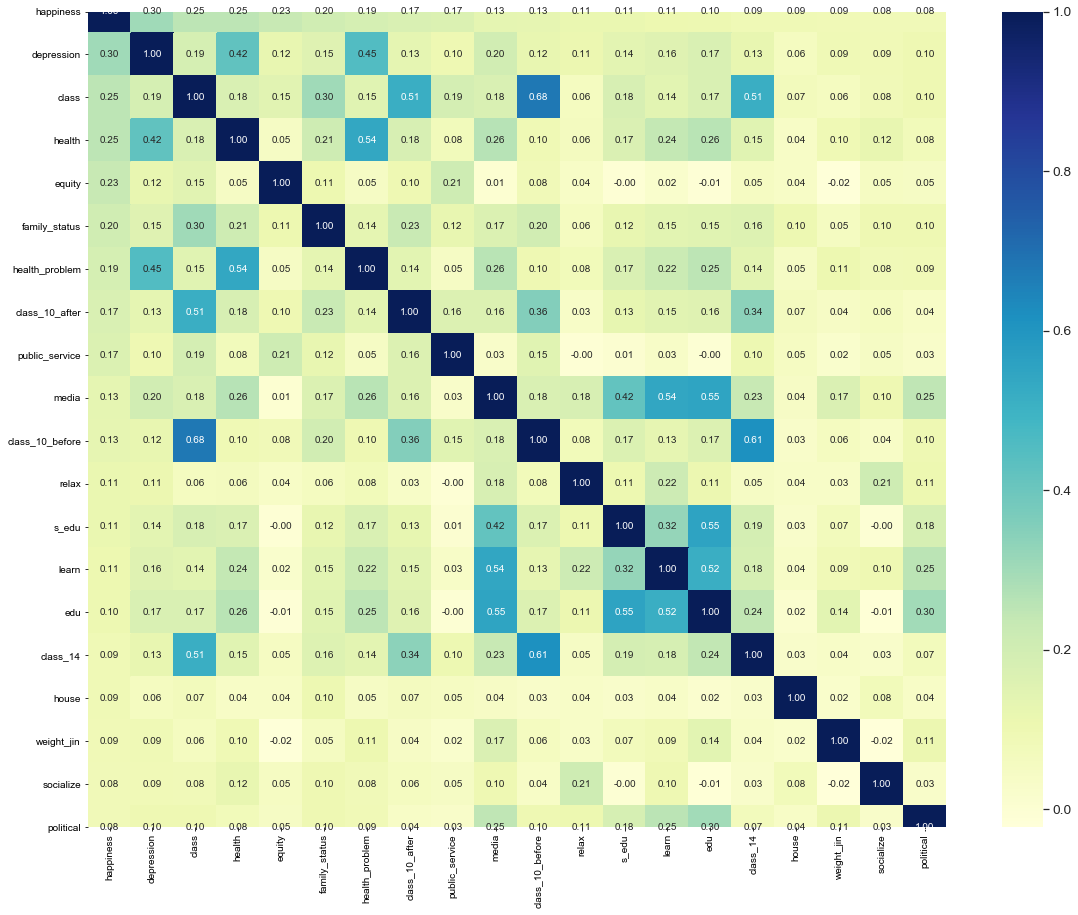

In [26]:
#查看与happiness较相关的20个特征
k = 20#number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, "happiness")["happiness"].index
cm = np.corrcoef(train[cols].values.T) #求相关系数矩阵
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap='YlGnBu')
plt.show()



In [27]:
list=[]
k = 20#number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, "happiness")["happiness"].index
i=0
while i<20:
    list.append(cols[i])
    i=i+1
train = train[list] #求相关系数矩阵
list.pop(0)
print(list)
test=test[list]

['depression', 'class', 'health', 'equity', 'family_status', 'health_problem', 'class_10_after', 'public_service', 'media', 'class_10_before', 'relax', 's_edu', 'learn', 'edu', 'class_14', 'house', 'weight_jin', 'socialize', 'political']


cmap：matplotlib的colormap名称或颜色对象
xticklabels: 如果是True，则绘制dataframe的列名
yticklabels: 如果是True，则绘制dataframe的行名
annot_kws，当annot为True时，可设置各个参数，包括大小，颜色，加粗，斜体字等
annot默认为False，当annot为True时，在heatmap中每个方格写入数据
fmt，格式设置

In [28]:
train.to_csv('C:/Users/成行/Desktop/dataset/happiness_train_clean.csv',index=0)
test.to_csv('C:/Users/成行/Desktop/dataset/happiness_test_clean.csv',index=0)